In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Classification/all_files_ZAv1.csv')

In [3]:
# data.columns

In [4]:
# Extract relevant columns
artists = data['main_artist']
tracks = data['track_name']
weights = data['artistAppearanceCount']  # Assuming this column contains the weights

In [5]:
def getprolificartists(df,appearancetimes):
    df = df[df["artistAppearanceCount"] > appearancetimes]
    prolific_artists = df["main_artist"].unique().tolist()
    
    return prolific_artists

In [6]:
theprolificones = getprolificartists(data,650)

In [7]:
len(theprolificones)

11

In [8]:
# Filter rows based on column values in the list
data = data[data['main_artist'].isin(theprolificones)]  # Replace 'column_name' with the actual column name

In [9]:
data.shape

(12009, 25)

In [10]:
data = data.reset_index()

In [11]:
data.columns

Index(['index', 'trackAppearanceCount', 'artistAppearanceCount',
       'artist_names', 'track_name', 'rank', 'uri', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams', 'End Date', 'Week',
       'Year', 'End Date Dt', 'Seconds since Epoch', 'End Date Aggregated',
       'ArtistCount', 'main_artist', 'isTopTen', 'Artist and Track',
       'rank difference', 'Position over Time', 'IsGirlGroup', 'IsBoyGroup'],
      dtype='object')

In [12]:
data = data.drop(["uri", 'index', 'Week', 'ArtistCount','trackAppearanceCount', 'isTopTen', 'artist_names', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'End Date', "End Date Dt", "Year", "Seconds since Epoch", "End Date Aggregated", "Artist and Track", 'rank difference', "Position over Time"],axis=1)

In [13]:
data.shape

(12009, 8)

In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(12009, 8)

In [16]:
data.columns

Index(['artistAppearanceCount', 'track_name', 'rank', 'source', 'streams',
       'main_artist', 'IsGirlGroup', 'IsBoyGroup'],
      dtype='object')

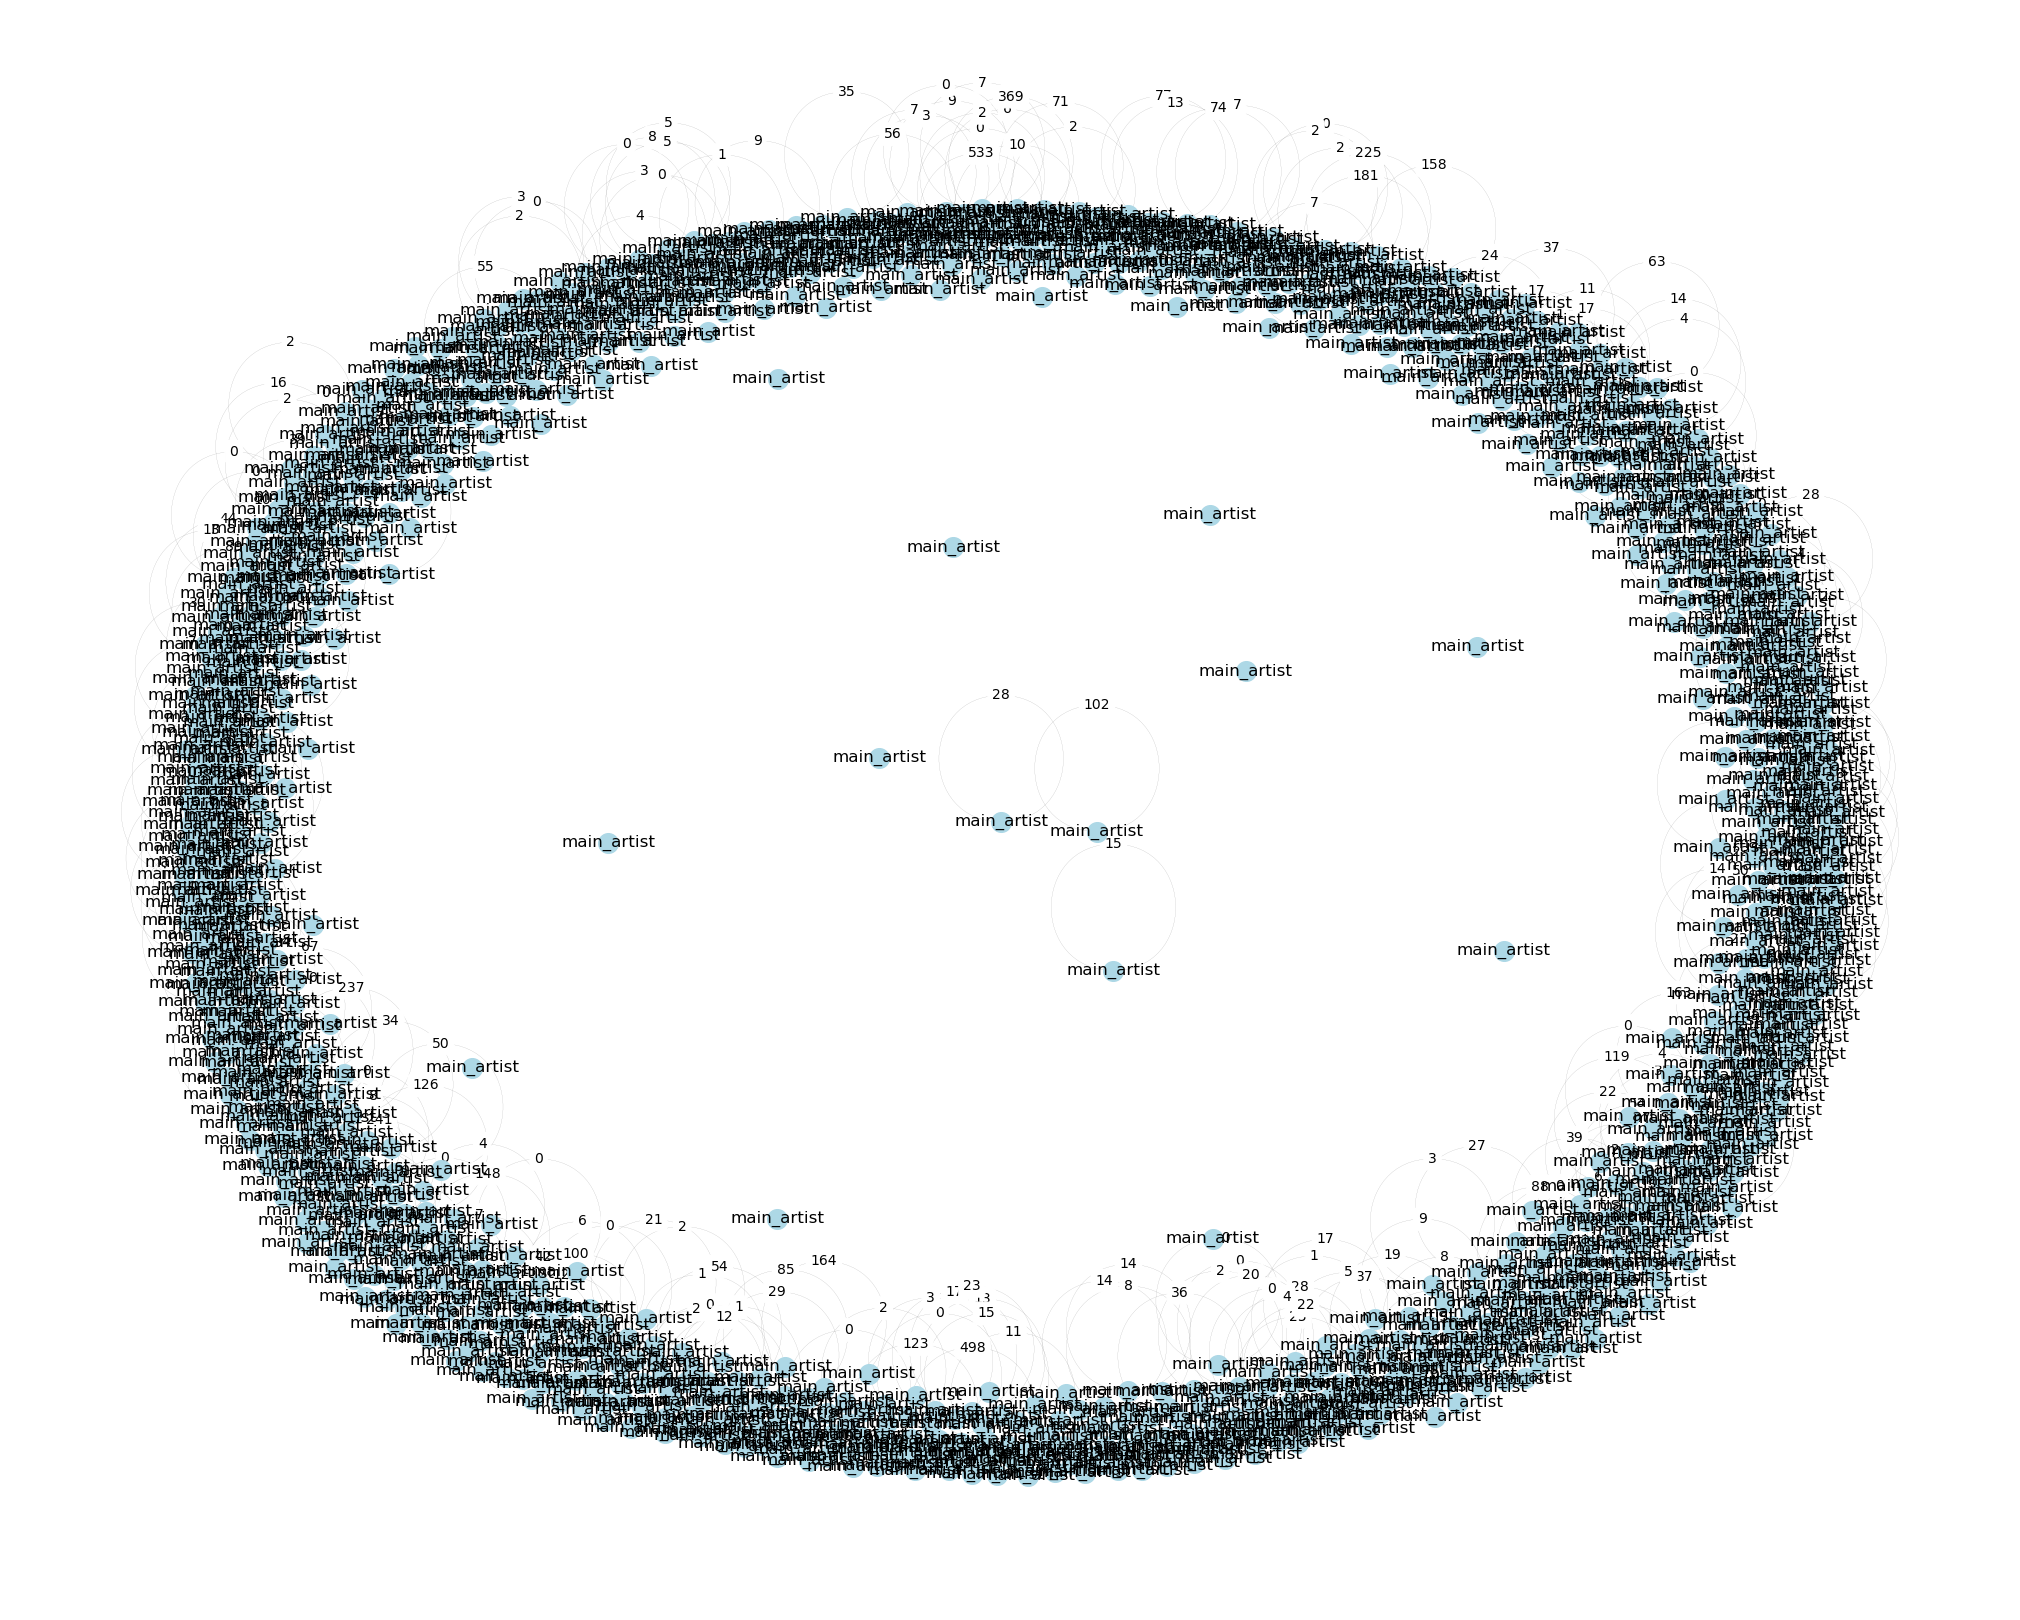

In [17]:
# Create a graph object
G = nx.Graph()

# Add nodes for artists and tracks
G.add_nodes_from(artists, label='main_artist')
# G.add_nodes_from(tracks, label='track')

# Add edges with weightings
for i in range(len(data)):
    artist = artists[i]
#     track = tracks[i]
    weight = weights[i]
    G.add_edge(artist, artist, weight=weight)

# Visualize the network diagram
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

pos = nx.spring_layout(G)  # Try different layout algorithms for better node positioning

# Customize node and edge styles
node_size = 200  # Increase the node size
node_color = 'lightblue'  # Change the node color
edge_color = 'gray'  # Change the edge color
edge_width = 0.1  # Adjust the edge thickness

labels = nx.get_node_attributes(G, 'label')
weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels, node_size=node_size, node_color=node_color,
        edge_color=edge_color, width=edge_width)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')  # Hide the axis to remove clutter
plt.show()